In [1]:
!pip install catboost
!pip install shap
!pip install optuna

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 99.2/99.2 MB 23.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 400.9/400.9 kB 11.2 MB/s eta 0:00:00


# ÎùºÏù¥Î∏åÎü¨Î¶¨

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import uniform, randint
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
from catboost import CatBoostClassifier
import shap
import optuna
import warnings

# Îç∞Ïù¥ÌÑ∞

In [3]:
data_full = pd.read_csv("/content/drive/MyDrive/·Ñá·Öµ·Ñã·Ö•·Ñë·Ö≥·ÜØ/25-2/model/tree_data_5m.csv")

In [4]:
data_full.head()

Movie_Title  wk1_Audience  wk1_AudiencePerShow  wk2_Audience  \
0        1987     14.460909             4.255117     14.579685   
1        2012     14.298959             4.768491     14.311517   
2        Í∞êÏãúÏûêÎì§     14.388882             4.346355     14.377501   
3        Í≤ÄÏÇ¨Ïô∏Ï†Ñ     15.016531             4.447146     15.372975   
4      Í≤ÄÏùÄ ÏÇ¨Ï†úÎì§     14.283719             4.317023     14.455399   

   wk2_AudiencePerShow  Show_Change  opening_Ho_Retention  \
0             4.205015     0.781548              0.633689   
1             4.260173     0.990697              0.612752   
2             4.123232     0.806430              0.563800   
3             4.360212     0.939867              0.673698   
4             3.881477     1.046961              0.555134   

   wk1_Holiday_AudienceMean  wk1_Holiday_ShowMean  wk2_Holiday_AudienceMean  \
0                 13.168432              8.538270                 13.045756   
1                 13.159393              8.206174                 12.991571   
2                 13.174882              8.550338                 12.896937   
3                 13.664691              9.073260                 13.625407   
4                 13.247543              8.695339                 12.949372   

   ...      e248      e249      e250      e251      e252      e253      e254  \
0  ... -0.029663  0.010803 -0.002991 -0.047607  0.010498 -0.006042  0.010986   
1  ...  0.016968  0.008972 -0.022339 -0.015747 -0.014832 -0.031982 -0.008484   
2  ... -0.032227 -0.009277  0.001450 -0.076172 -0.017090 -0.003510 -0.013000   
3  ... -0.017944 -0.008667 -0.003723 -0.052490 -0.030151 -0.022339  0.005646   
4  ... -0.043945 -0.031006  0.002960 -0.036377 -0.032471 -0.053223  0.000710   

       e255      e256 target  
0  0.033936  0.011536      1  
1  0.036865 -0.003265      1  
2  0.029785  0.007996      1  
3  0.015747  0.021729      2  
4  0.042480  0.035400      1  

[5 rows x 277 columns]

In [5]:
print(list(data_full.columns))

['Movie_Title', 'wk1_Audience', 'wk1_AudiencePerShow', 'wk2_Audience', 'wk2_AudiencePerShow', 'Show_Change', 'opening_Ho_Retention', 'wk1_Holiday_AudienceMean', 'wk1_Holiday_ShowMean', 'wk2_Holiday_AudienceMean', 'wk2_Holiday_ShowMean', 'opening_AudienceStd', 'Month', 'Pandemic', 'dist_big_flop', 'dist_big_hit', 'dist_small_flop', 'dist_small_hit', 'Grade', 'Main_Country', 'e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12', 'e13', 'e14', 'e15', 'e16', 'e17', 'e18', 'e19', 'e20', 'e21', 'e22', 'e23', 'e24', 'e25', 'e26', 'e27', 'e28', 'e29', 'e30', 'e31', 'e32', 'e33', 'e34', 'e35', 'e36', 'e37', 'e38', 'e39', 'e40', 'e41', 'e42', 'e43', 'e44', 'e45', 'e46', 'e47', 'e48', 'e49', 'e50', 'e51', 'e52', 'e53', 'e54', 'e55', 'e56', 'e57', 'e58', 'e59', 'e60', 'e61', 'e62', 'e63', 'e64', 'e65', 'e66', 'e67', 'e68', 'e69', 'e70', 'e71', 'e72', 'e73', 'e74', 'e75', 'e76', 'e77', 'e78', 'e79', 'e80', 'e81', 'e82', 'e83', 'e84', 'e85', 'e86', 'e87', 'e88', 'e89', 'e90', 'e9

## Î≤îÏ£ºÌòï Î≥ÄÏàò ÏßÄÏ†ï

In [6]:
cat_features = ['Grade', 'Main_Country', 'Pandemic', 'Month']

## Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†

Ï¥ù Í¥ÄÎûåÍ∞ù Ïàò, Ï¥ù ÏÉÅÏòÅÏùºÏàò ÌöüÏàò, Ï¥ù ÏÉÅÏòÅ Ï£ºÏ∞®Îäî Ï¢ÖÏÜçÎ≥ÄÏàòÏù¥ÎØÄÎ°ú Ï†úÍ±∞ÌïúÎã§

In [7]:
movie_titles = data_full['Movie_Title']

In [8]:
X = data_full.drop(['Movie_Title', 'target'], axis=1)
y = data_full['target']
# target(y)Î•º Í∏∞Ï§ÄÏúºÎ°ú Í≥ÑÏ∏µ Î∂ÑÎ¶¨
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 1. CatBoost ÏÇ¨Ïö©

## 1) Ï¥àÍ∏∞ Íµ¨Îèô

In [9]:
model = CatBoostClassifier(
    iterations=500,
    verbose=100,  # 100Î≤àÎßàÎã§ ÌïôÏäµ Î°úÍ∑∏ Ï∂úÎ†•
    task_type='GPU',  # GPU ÏÇ¨Ïö© ÏÑ§Ï†ï
    devices='0',       # Ï≤´ Î≤àÏß∏ GPU ÏÇ¨Ïö©
    cat_features=cat_features, # Î≤îÏ£ºÌòï Î≥ÄÏàò ÏßÄÏ†ï
    auto_class_weights='Balanced' #Ìù¨Í∑Ä ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò
)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
prediction_probs = model.predict_proba(X_test)

# Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï† DataFrame ÏÉùÏÑ±
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': predictions.flatten() # 1Ï∞®Ïõê Î∞∞Ïó¥Î°ú Î≥ÄÌôò
})

# Í∞Å ÌÅ¥ÎûòÏä§Ïùò ÌôïÎ•†ÏùÑ Î≥ÑÎèÑÏùò Ïª¨ÎüºÏúºÎ°ú Ï∂îÍ∞Ä
results_df['Prob_Class_0'] = prediction_probs[:, 0]
results_df['Prob_Class_1'] = prediction_probs[:, 1]
results_df['Prob_Class_2'] = prediction_probs[:, 2]

# ÏòÅÌôî Ï†úÎ™© Ï∂îÍ∞Ä
test_titles = movie_titles.loc[X_test.index]
results_df['Movie_Title'] = test_titles.values

Learning rate set to 0.134673
0:	learn: 0.8599792	total: 15.3ms	remaining: 7.65s
100:	learn: 0.0052785	total: 845ms	remaining: 3.34s
200:	learn: 0.0020587	total: 1.68s	remaining: 2.49s
300:	learn: 0.0011570	total: 2.5s	remaining: 1.65s
400:	learn: 0.0007576	total: 3.29s	remaining: 812ms
499:	learn: 0.0005620	total: 4.07s	remaining: 0us


In [10]:
# Í≤∞Í≥º ÌôïÏù∏
print(results_df.head())

      Actual  Predicted  Prob_Class_0  Prob_Class_1  Prob_Class_2 Movie_Title
1340       0          0      0.999916      0.000080  4.277892e-06         ÌïòÏö∏ÎßÅ
1385       0          0      0.999974      0.000025  8.093067e-07        ÌÅ¨Î¶¨ÎØ∏ÎÑê
1231       0          0      0.999966      0.000032  1.607464e-06     ÏÇ¨ÎûëÏùò Î†àÏãúÌîº
1225       0          0      0.999956      0.000042  1.883687e-06        Î¨∏ÎùºÏù¥Ìä∏
1894       0          0      0.999949      0.000050  1.162991e-06    ÌîÑÎùºÎØ∏Ïä§Îìú ÎûúÎìú


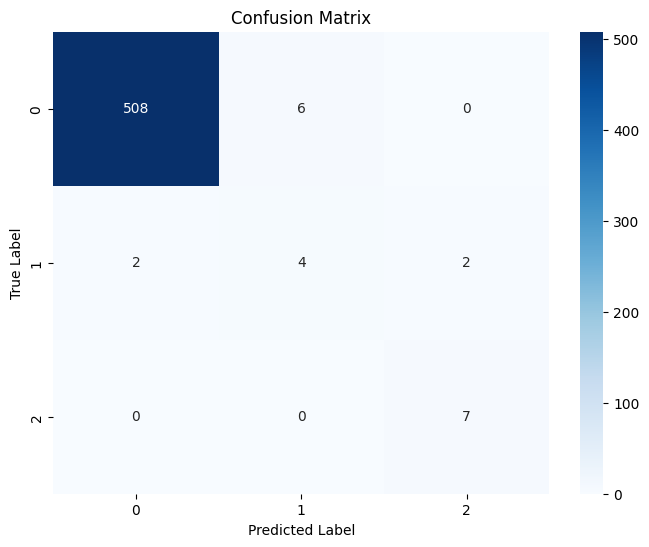

In [11]:
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [12]:
def calculate_multiclass_metrics(y_true, y_pred):
    """
    Îã§Ï§ë Î∂ÑÎ•ò Í≤∞Í≥ºÎ°úÎ∂ÄÌÑ∞ Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ Ï†ïÎ∞ÄÎèÑ, Ïû¨ÌòÑÏú®, ÌäπÏù¥ÎèÑÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
    """
    cm = confusion_matrix(y_true, y_pred)
    num_classes = cm.shape[0]
    metrics = {}

    for i in range(num_classes):
        # One-vs-Rest Í¥ÄÏ†êÏóêÏÑú TP, FP, FN, TN Í≥ÑÏÇ∞
        tp = cm[i, i]
        fp = cm[:, i].sum() - tp
        fn = cm[i, :].sum() - tp
        tn = cm.sum() - (tp + fp + fn)

        # Ï†ïÎ∞ÄÎèÑ (Precision)
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
        # Ïû¨ÌòÑÏú® (Recall or Sensitivity)
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
        # ÌäπÏù¥ÎèÑ (Specificity)
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0

        metrics[f'Precision_Class_{i}'] = precision
        metrics[f'Recall_Class_{i}'] = recall
        metrics[f'Specificity_Class_{i}'] = specificity

    return metrics

In [13]:
calculate_multiclass_metrics(y_test, predictions)

{'Precision_Class_0': np.float64(0.996078431372549),
 'Recall_Class_0': np.float64(0.9883268482490273),
 'Specificity_Class_0': np.float64(0.8666666666666667),
 'Precision_Class_1': np.float64(0.4),
 'Recall_Class_1': np.float64(0.5),
 'Specificity_Class_1': np.float64(0.9884836852207294),
 'Precision_Class_2': np.float64(0.7777777777777778),
 'Recall_Class_2': np.float64(1.0),
 'Specificity_Class_2': np.float64(0.9961685823754789)}

## 2) Î≥ÄÏàò Ï§ëÏöîÎèÑ

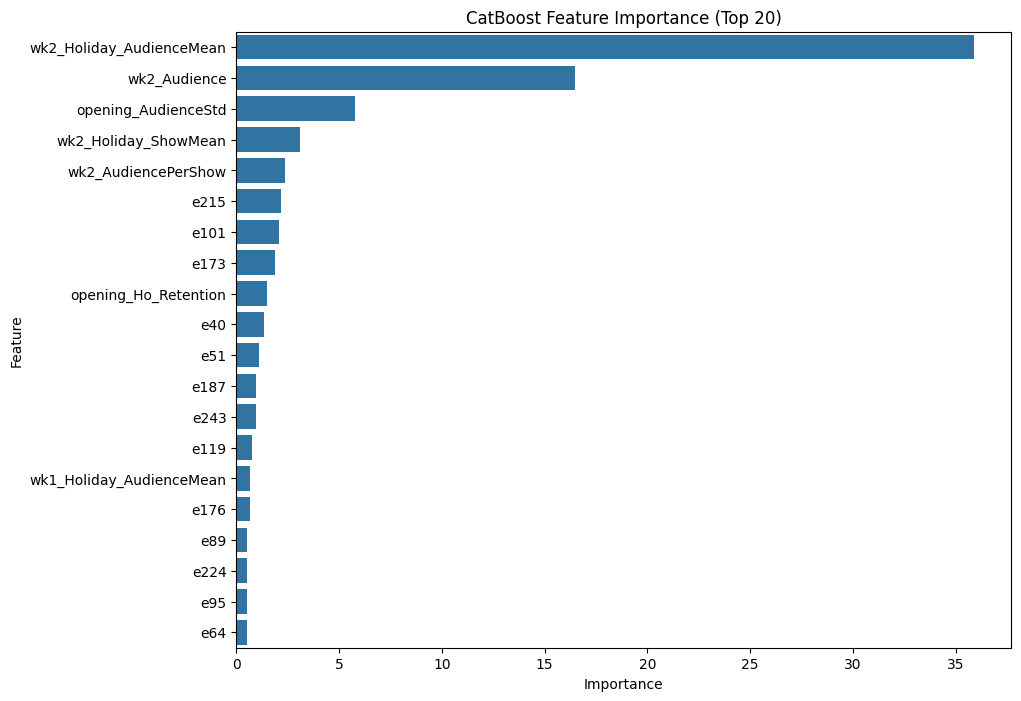

                      Feature  Importance
8    wk2_Holiday_AudienceMean   35.913078
2                wk2_Audience   16.491024
10        opening_AudienceStd    5.791006
9        wk2_Holiday_ShowMean    3.084307
3         wk2_AudiencePerShow    2.353350
233                      e215    2.180642
119                      e101    2.059146
191                      e173    1.890349
5        opening_Ho_Retention    1.481904
58                        e40    1.351839
69                        e51    1.095038
205                      e187    0.978457
261                      e243    0.966562
137                      e119    0.741450
6    wk1_Holiday_AudienceMean    0.660423
194                      e176    0.652208
107                       e89    0.531374
242                      e224    0.522214
113                       e95    0.516488
82                        e64    0.514701


In [14]:
# 1. Î≥ÄÏàò Ï§ëÏöîÎèÑ Ï∂îÏ∂ú
feature_importances = model.get_feature_importance()
feature_names = X_train.columns

# 2. Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú ÎßåÎì§Í∏∞
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# 3. ÏÉÅÏúÑ 20Í∞ú Î≥ÄÏàò Ï§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title('CatBoost Feature Importance (Top 20)')
plt.show()

# 4. Ï§ëÏöîÎèÑ Ï∂úÎ†•
print(importance_df.head(20))

1. `wk2_Holiday_AudienceMean`, `wk2_Audience`
2. `opening_Ho_Retention`, `wk2_Holiday_ShowMean`, `wk2_AudiencePerShow`

Ï¥ù 2+3Ïùò Î≥ÄÏàòÍ∞Ä Ïú†ÏùòÌõÑÎ≥¥Íµ∞

## 3) Î≥ÄÏàò ÏÑ†ÌÉù Î∞è ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù

In [15]:
optuna.logging.set_verbosity(optuna.logging.WARNING)
warnings.filterwarnings('ignore')

In [16]:
feature_sets = {
    "base_2": ['wk2_Holiday_AudienceMean', 'wk2_Audience'],
    "medium_6": ['wk2_Holiday_AudienceMean', 'wk2_Audience',
                 'opening_Ho_Retention', 'wk2_Holiday_ShowMean', 'wk2_AudiencePerShow']
}

embedding_sets = {
    "embed_128": [f'e{i+1}' for i in range(128)],
    "embed_64": [f'e{i+1}' for i in range(64)],
    "embed_32": [f'e{i+1}' for i in range(32)],
    "embed_none" : []
}

tuner_methods = ['optuna', 'random_search']
# tuner_methods = ['random_search', 'optuna']

In [ ]:
results = []
experiment_id = 0
total_experiments = len(feature_sets) * len(embedding_sets) * len(tuner_methods)

for f_name, f_cols in feature_sets.items():
    for e_name, e_cols in embedding_sets.items():

        # ÌòÑÏû¨ Ï°∞Ìï©Ïóê ÏÇ¨Ïö©Ìï† Ï†ÑÏ≤¥ Î≥ÄÏàò Î¶¨Ïä§Ìä∏ ÏÉùÏÑ±
        current_cols = f_cols + e_cols
        X_train_exp = X_train[current_cols]
        X_test_exp = X_test[current_cols]

        cat_features_in_use = [c for c in ['Pandemic'] if c in X_train_exp.columns]

        for tuner in tuner_methods:
            experiment_id += 1
            print(f"--- Ïã§Ìóò {experiment_id}/{total_experiments} ÏßÑÌñâ Ï§ë ---")
            print(f"Features: {f_name}, Embeddings: {e_name}, Tuner: {tuner}")

            best_params = {}

            if tuner == 'optuna':
                def objective(trial):
                    param_optuna = {
                        'objective': 'MultiClass',
                        'auto_class_weights': 'Balanced',

                        'iterations': 300,
                        # 'iterations': 2,

                        'verbose' : 0,
                        'task_type': 'GPU',
                        'devices': '0',
                        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
                        'depth': trial.suggest_int('depth', 4, 10),
                        'bootstrap_type': 'Bernoulli',
                        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
                        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10, log=True),
                        'random_strength': trial.suggest_float('random_strength', 1e-9, 10, log=True),
                        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
                        'leaf_estimation_method': trial.suggest_categorical('leaf_estimation_method', ['Newton', 'Gradient'])
                    }
                    model = CatBoostClassifier(**param_optuna)
                    score = cross_val_score(model, X_train_exp, y_train, cv=3, scoring='f1_macro').mean()
                    return score

                study = optuna.create_study(direction='maximize')

                study.optimize(objective, n_trials=40, n_jobs=1, show_progress_bar=True)
                # study.optimize(objective, n_trials=2, n_jobs=1, show_progress_bar=True)

                best_params = study.best_params

            elif tuner == 'random_search':
                param_random = {
                     # --- OptunaÏôÄ ÎèôÏùºÌïòÍ≤å ÌôïÏû•Îêú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ---
                    'learning_rate': uniform(0.01, 0.29), # 0.01Î∂ÄÌÑ∞ 0.3ÍπåÏßÄ (uniform Î∂ÑÌè¨)
                    'depth': randint(4, 11), # 4Î∂ÄÌÑ∞ 10ÍπåÏßÄ (Ï†ïÏàò)
                    'bootstrap_type': ['Bernoulli'],
                    'subsample': uniform(0.6, 0.4), # 0.6Î∂ÄÌÑ∞ 1.0ÍπåÏßÄ
                    'l2_leaf_reg': uniform(1, 9), # 1Î∂ÄÌÑ∞ 10ÍπåÏßÄ
                    'random_strength': uniform(1, 9), # 1Î∂ÄÌÑ∞ 10ÍπåÏßÄ (log Î∂ÑÌè¨ ÎåÄÏã† uniform ÏÇ¨Ïö©)
                    'min_child_samples': randint(5, 101), # 5Î∂ÄÌÑ∞ 100ÍπåÏßÄ
                    'leaf_estimation_method': ['Newton', 'Gradient']
                }
                model = CatBoostClassifier(objective='MultiClass', auto_class_weights='Balanced', iterations=300, verbose=0, task_type='GPU', devices='0')
                # model = CatBoostClassifier(objective='MultiClass', auto_class_weights='Balanced', iterations=2, verbose=0, task_type='GPU', devices='0')
                random_search = RandomizedSearchCV(
                    model,
                    param_distributions=param_random,

                    n_iter=40,
                    # n_iter=2,

                    cv=3,
                    scoring='f1_macro',
                    random_state=42,
                    verbose=1,
                    n_jobs=1
                )
                random_search.fit(X_train_exp, y_train)
                best_params = random_search.best_params_

            # Ï∞æÏùÄ ÏµúÏ†ÅÏùò ÌååÎùºÎØ∏ÌÑ∞Î°ú ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ
            print(f"{f_name} - {e_name} - {tuner} ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ")
            if 'subsample' in best_params:
                best_params['bootstrap_type'] = 'Bernoulli'
            final_model = CatBoostClassifier(
                objective='MultiClass',
                auto_class_weights='Balanced',

                iterations=1000,
                # iterations=2,

                verbose=200,
                task_type='GPU',
                devices='0',
                **best_params
            )
            final_model.fit(X_train_exp, y_train)

            # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú ÏÑ±Îä• ÌèâÍ∞Ä
            preds = final_model.predict(X_test_exp)
            f1 = f1_score(y_test, preds, average='macro')
            detailed_metrics = calculate_multiclass_metrics(y_test, preds)

            # Í≤∞Í≥º Ï†ÄÏû•
            result_row = {
                "Experiment_ID": experiment_id,
                "Feature_Set": f_name,
                "Embedding_Set": e_name,
                "Tuner": tuner,
                "Test_F1_Macro": f1,
                "Best_Params": best_params
            }
            result_row.update(detailed_metrics)
            results.append(result_row)
            print(f"Í≤∞Í≥º - F1 Macro: {f1:.4f}\n")

--- Ïã§Ìóò 1/16 ÏßÑÌñâ Ï§ë ---
Features: base_2, Embeddings: embed_128, Tuner: optuna


  0%|          | 0/40 [00:00<?, ?it/s]

base_2 - embed_128 - optuna ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ
0:	learn: 0.9406356	total: 25.1ms	remaining: 25s
200:	learn: 0.0011862	total: 4.56s	remaining: 18.1s
400:	learn: 0.0005212	total: 9.11s	remaining: 13.6s
600:	learn: 0.0003273	total: 13.6s	remaining: 9.03s
800:	learn: 0.0002341	total: 18.2s	remaining: 4.53s
999:	learn: 0.0001825	total: 22.9s	remaining: 0us
Í≤∞Í≥º - F1 Macro: 0.8203

--- Ïã§Ìóò 2/16 ÏßÑÌñâ Ï§ë ---
Features: base_2, Embeddings: embed_128, Tuner: random_search
Fitting 3 folds for each of 40 candidates, totalling 120 fits
base_2 - embed_128 - random_search ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ
0:	learn: 0.8948920	total: 28.5ms	remaining: 28.4s
200:	learn: 0.0043197	total: 4.79s	remaining: 19s
400:	learn: 0.0019628	total: 10.2s	remaining: 15.3s
600:	learn: 0.0012636	total: 15.6s	remaining: 10.4s
800:	learn: 0.0009324	total: 20.9s	remaining: 5.18s
999:	learn: 0.0007399	total: 26.1s	remaining: 0us
Í≤∞Í≥º - F1 Macro: 0.7772

--- Ïã§Ìóò 3/16 ÏßÑÌñâ Ï§ë ---
Features: base_2, Embeddings: embed_64, T

  0%|          | 0/40 [00:00<?, ?it/s]

base_2 - embed_64 - optuna ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ
0:	learn: 1.0592629	total: 20.3ms	remaining: 20.2s
200:	learn: 0.0370028	total: 3.64s	remaining: 14.5s
400:	learn: 0.0149980	total: 7.23s	remaining: 10.8s
600:	learn: 0.0091161	total: 11s	remaining: 7.33s
800:	learn: 0.0065078	total: 14.8s	remaining: 3.67s
999:	learn: 0.0050562	total: 18.3s	remaining: 0us
Í≤∞Í≥º - F1 Macro: 0.7705

--- Ïã§Ìóò 4/16 ÏßÑÌñâ Ï§ë ---
Features: base_2, Embeddings: embed_64, Tuner: random_search
Fitting 3 folds for each of 40 candidates, totalling 120 fits
base_2 - embed_64 - random_search ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ
0:	learn: 0.8984461	total: 19.8ms	remaining: 19.8s
200:	learn: 0.0044481	total: 3.27s	remaining: 13s
400:	learn: 0.0020043	total: 6.89s	remaining: 10.3s
600:	learn: 0.0012836	total: 10.5s	remaining: 7s
800:	learn: 0.0009459	total: 14.2s	remaining: 3.52s
999:	learn: 0.0007496	total: 17.7s	remaining: 0us
Í≤∞Í≥º - F1 Macro: 0.7772

--- Ïã§Ìóò 5/16 ÏßÑÌñâ Ï§ë ---
Features: base_2, Embeddings: embed_32, Tuner: 

  0%|          | 0/40 [00:00<?, ?it/s]

base_2 - embed_32 - optuna ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ
0:	learn: 1.0724091	total: 12.3ms	remaining: 12.3s
200:	learn: 0.0615827	total: 2.14s	remaining: 8.49s
400:	learn: 0.0236906	total: 4.35s	remaining: 6.5s
600:	learn: 0.0140224	total: 6.57s	remaining: 4.36s
800:	learn: 0.0098317	total: 8.7s	remaining: 2.16s
999:	learn: 0.0075448	total: 10.8s	remaining: 0us
Í≤∞Í≥º - F1 Macro: 0.7561

--- Ïã§Ìóò 6/16 ÏßÑÌñâ Ï§ë ---
Features: base_2, Embeddings: embed_32, Tuner: random_search
Fitting 3 folds for each of 40 candidates, totalling 120 fits
base_2 - embed_32 - random_search ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ
0:	learn: 1.0014737	total: 10.2ms	remaining: 10.2s
200:	learn: 0.0141194	total: 1.35s	remaining: 5.37s
400:	learn: 0.0054418	total: 2.78s	remaining: 4.15s
600:	learn: 0.0033049	total: 4.24s	remaining: 2.82s
800:	learn: 0.0023712	total: 5.65s	remaining: 1.4s
999:	learn: 0.0018524	total: 7.04s	remaining: 0us
Í≤∞Í≥º - F1 Macro: 0.7897

--- Ïã§Ìóò 7/16 ÏßÑÌñâ Ï§ë ---
Features: base_2, Embeddings: embed_none, T

  0%|          | 0/40 [00:00<?, ?it/s]

base_2 - embed_none - optuna ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ
0:	learn: 1.0559395	total: 6.46ms	remaining: 6.45s
200:	learn: 0.1226903	total: 1s	remaining: 3.99s
400:	learn: 0.1063231	total: 2.03s	remaining: 3.04s
600:	learn: 0.1012261	total: 3.05s	remaining: 2.02s
800:	learn: 0.0988535	total: 4.07s	remaining: 1.01s
999:	learn: 0.0974335	total: 5.06s	remaining: 0us
Í≤∞Í≥º - F1 Macro: 0.7624

--- Ïã§Ìóò 8/16 ÏßÑÌñâ Ï§ë ---
Features: base_2, Embeddings: embed_none, Tuner: random_search
Fitting 3 folds for each of 40 candidates, totalling 120 fits
base_2 - embed_none - random_search ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ
0:	learn: 0.9969749	total: 5.76ms	remaining: 5.76s
200:	learn: 0.0982472	total: 811ms	remaining: 3.22s
400:	learn: 0.0948043	total: 1.68s	remaining: 2.51s
600:	learn: 0.0936678	total: 2.54s	remaining: 1.69s
800:	learn: 0.0931593	total: 3.4s	remaining: 844ms
999:	learn: 0.0929074	total: 4.25s	remaining: 0us
Í≤∞Í≥º - F1 Macro: 0.7561

--- Ïã§Ìóò 9/16 ÏßÑÌñâ Ï§ë ---
Features: medium_6, Embeddings: embed_

  0%|          | 0/40 [00:00<?, ?it/s]

medium_6 - embed_128 - optuna ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ
0:	learn: 0.8011209	total: 9.85ms	remaining: 9.84s
200:	learn: 0.0005143	total: 1.67s	remaining: 6.64s
400:	learn: 0.0001987	total: 3.33s	remaining: 4.98s
600:	learn: 0.0001291	total: 5.02s	remaining: 3.33s
800:	learn: 0.0000913	total: 6.76s	remaining: 1.68s
999:	learn: 0.0000716	total: 8.44s	remaining: 0us
Í≤∞Í≥º - F1 Macro: 0.7659

--- Ïã§Ìóò 10/16 ÏßÑÌñâ Ï§ë ---
Features: medium_6, Embeddings: embed_128, Tuner: random_search
Fitting 3 folds for each of 40 candidates, totalling 120 fits
medium_6 - embed_128 - random_search ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ
0:	learn: 0.6892177	total: 24.4ms	remaining: 24.3s
200:	learn: 0.0020493	total: 4.6s	remaining: 18.3s
400:	learn: 0.0010554	total: 9.06s	remaining: 13.5s
600:	learn: 0.0007027	total: 13.6s	remaining: 9.04s
800:	learn: 0.0005131	total: 18.3s	remaining: 4.54s
999:	learn: 0.0003943	total: 22.8s	remaining: 0us
Í≤∞Í≥º - F1 Macro: 0.8274

--- Ïã§Ìóò 11/16 ÏßÑÌñâ Ï§ë ---
Features: medium_6, Embeddings

  0%|          | 0/40 [00:00<?, ?it/s]

medium_6 - embed_64 - optuna ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ
0:	learn: 0.9056318	total: 17.3ms	remaining: 17.3s
200:	learn: 0.0034579	total: 2.94s	remaining: 11.7s
400:	learn: 0.0016851	total: 5.94s	remaining: 8.88s
600:	learn: 0.0010748	total: 8.86s	remaining: 5.88s
800:	learn: 0.0007989	total: 11.8s	remaining: 2.93s
999:	learn: 0.0006327	total: 14.8s	remaining: 0us
Í≤∞Í≥º - F1 Macro: 0.7796

--- Ïã§Ìóò 12/16 ÏßÑÌñâ Ï§ë ---
Features: medium_6, Embeddings: embed_64, Tuner: random_search
Fitting 3 folds for each of 40 candidates, totalling 120 fits
medium_6 - embed_64 - random_search ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ
0:	learn: 0.7901088	total: 15.7ms	remaining: 15.7s
200:	learn: 0.0020267	total: 2.85s	remaining: 11.3s
400:	learn: 0.0011395	total: 5.79s	remaining: 8.65s
600:	learn: 0.0008248	total: 8.84s	remaining: 5.87s
800:	learn: 0.0006174	total: 11.8s	remaining: 2.94s
999:	learn: 0.0005063	total: 14.8s	remaining: 0us
Í≤∞Í≥º - F1 Macro: 0.7796

--- Ïã§Ìóò 13/16 ÏßÑÌñâ Ï§ë ---
Features: medium_6, Embeddings: 

  0%|          | 0/40 [00:00<?, ?it/s]

medium_6 - embed_32 - optuna ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ
0:	learn: 1.0121165	total: 5.16ms	remaining: 5.16s
200:	learn: 0.0073582	total: 724ms	remaining: 2.88s
400:	learn: 0.0027127	total: 1.44s	remaining: 2.16s
600:	learn: 0.0014221	total: 2.16s	remaining: 1.43s
800:	learn: 0.0008973	total: 2.88s	remaining: 716ms
999:	learn: 0.0006621	total: 3.59s	remaining: 0us
Í≤∞Í≥º - F1 Macro: 0.8082

--- Ïã§Ìóò 14/16 ÏßÑÌñâ Ï§ë ---
Features: medium_6, Embeddings: embed_32, Tuner: random_search
Fitting 3 folds for each of 40 candidates, totalling 120 fits
medium_6 - embed_32 - random_search ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ
0:	learn: 1.0014737	total: 8.86ms	remaining: 8.85s
200:	learn: 0.0139193	total: 1.13s	remaining: 4.48s
400:	learn: 0.0053590	total: 2.59s	remaining: 3.88s
600:	learn: 0.0032608	total: 4.01s	remaining: 2.67s
800:	learn: 0.0023470	total: 5.43s	remaining: 1.35s
999:	learn: 0.0018352	total: 6.88s	remaining: 0us
Í≤∞Í≥º - F1 Macro: 0.8386

--- Ïã§Ìóò 15/16 ÏßÑÌñâ Ï§ë ---
Features: medium_6, Embeddings: 

  0%|          | 0/40 [00:00<?, ?it/s]

medium_6 - embed_none - optuna ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ
0:	learn: 0.7802815	total: 4.8ms	remaining: 4.79s
200:	learn: 0.0032272	total: 850ms	remaining: 3.38s
400:	learn: 0.0015040	total: 1.81s	remaining: 2.71s
600:	learn: 0.0009771	total: 2.75s	remaining: 1.82s
800:	learn: 0.0007244	total: 3.53s	remaining: 877ms
999:	learn: 0.0005753	total: 4.35s	remaining: 0us
Í≤∞Í≥º - F1 Macro: 0.7984

--- Ïã§Ìóò 16/16 ÏßÑÌñâ Ï§ë ---
Features: medium_6, Embeddings: embed_none, Tuner: random_search
Fitting 3 folds for each of 40 candidates, totalling 120 fits
medium_6 - embed_none - random_search ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ
0:	learn: 0.6760210	total: 3.06ms	remaining: 3.06s
200:	learn: 0.0034201	total: 408ms	remaining: 1.62s
400:	learn: 0.0013442	total: 820ms	remaining: 1.22s
600:	learn: 0.0007811	total: 1.24s	remaining: 826ms
800:	learn: 0.0005523	total: 1.69s	remaining: 419ms
999:	learn: 0.0004276	total: 2.11s	remaining: 0us
Í≤∞Í≥º - F1 Macro: 0.8400



In [ ]:
results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values(by='Test_F1_Macro', ascending=False)

print("========== ÏµúÏ¢Ö Ïã§Ìóò Í≤∞Í≥º (F1 Score Í∏∞Ï§Ä Ï†ïÎ†¨) ==========")
pd.set_option('display.max_rows', None)
results_df_sorted.head(50)

========== ÏµúÏ¢Ö Ïã§Ìóò Í≤∞Í≥º (F1 Score Í∏∞Ï§Ä Ï†ïÎ†¨) ==========


Experiment_ID Feature_Set Embedding_Set          Tuner  Test_F1_Macro  \
15             16    medium_6    embed_none  random_search       0.839970   
13             14    medium_6      embed_32  random_search       0.838574   
9              10    medium_6     embed_128  random_search       0.827353   
0               1      base_2     embed_128         optuna       0.820277   
12             13    medium_6      embed_32         optuna       0.808232   
14             15    medium_6    embed_none         optuna       0.798371   
5               6      base_2      embed_32  random_search       0.789717   
10             11    medium_6      embed_64         optuna       0.779586   
11             12    medium_6      embed_64  random_search       0.779586   
3               4      base_2      embed_64  random_search       0.777226   
1               2      base_2     embed_128  random_search       0.777226   
2               3      base_2      embed_64         optuna       0.770544   
8               9    medium_6     embed_128         optuna       0.765912   
6               7      base_2    embed_none         optuna       0.762418   
7               8      base_2    embed_none  random_search       0.756061   
4               5      base_2      embed_32         optuna       0.756061   

                                          Best_Params  Precision_Class_0  \
15  {'bootstrap_type': 'Bernoulli', 'depth': 4, 'l...           0.998047   
13  {'bootstrap_type': 'Bernoulli', 'depth': 8, 'l...           0.996094   
9   {'bootstrap_type': 'Bernoulli', 'depth': 10, '...           0.996086   
0   {'learning_rate': 0.09519506057374602, 'depth'...           0.994163   
12  {'learning_rate': 0.0513372786126497, 'depth':...           0.998039   
14  {'learning_rate': 0.16545917117467682, 'depth'...           1.000000   
5   {'bootstrap_type': 'Bernoulli', 'depth': 8, 'l...           0.996094   
10  {'learning_rate': 0.12462856525906385, 'depth'...           0.996086   
11  {'bootstrap_type': 'Bernoulli', 'depth': 10, '...           0.996086   
3   {'bootstrap_type': 'Bernoulli', 'depth': 10, '...           0.994175   
1   {'bootstrap_type': 'Bernoulli', 'depth': 10, '...           0.994175   
2   {'learning_rate': 0.019662746051055908, 'depth...           0.996078   
8   {'learning_rate': 0.18752094120929008, 'depth'...           0.994163   
6   {'learning_rate': 0.021898205943329196, 'depth...           0.996071   
7   {'bootstrap_type': 'Bernoulli', 'depth': 7, 'l...           0.994152   
4   {'learning_rate': 0.013338747135423788, 'depth...           0.994152   

    Recall_Class_0  Specificity_Class_0  Precision_Class_1  Recall_Class_1  \
15        0.994163             0.933333           0.600000           0.750   
13        0.992218             0.866667           0.555556           0.625   
9         0.990272             0.866667           0.500000           0.625   
0         0.994163             0.800000           0.571429           0.500   
12        0.990272             0.933333           0.500000           0.625   
14        0.990272             1.000000           0.500000           0.750   
5         0.992218             0.866667           0.500000           0.500   
10        0.990272             0.866667           0.444444           0.500   
11        0.990272             0.866667           0.444444           0.500   
3         0.996109             0.800000           0.600000           0.375   
1         0.996109             0.800000           0.600000           0.375   
2         0.988327             0.866667           0.400000           0.500   
8         0.994163             0.800000           0.500000           0.375   
6         0.986381             0.866667           0.363636           0.500   
7         0.992218             0.800000           0.428571           0.375   
4         0.992218             0.800000           0.428571           0.375   

    Specificity_Class_1  Precision_Class_2  Recall_Class_2  \
15          

## 4) ÏµúÏ¢Ö Î™®Îç∏ ÏÉùÏÑ±

In [ ]:
# 5-1. Í∞ÄÏû• Ï†êÏàòÍ∞Ä ÎÜíÏïòÎçò Ïã§ÌóòÏùò ÏÑ§Ï†ï Í∞ÄÏ†∏Ïò§Í∏∞
best_experiment = results_df_sorted.iloc[0]
best_f_name = best_experiment['Feature_Set']
best_e_name = best_experiment['Embedding_Set']
best_params = best_experiment['Best_Params']

print(f"ÏµúÍ≥† ÏÑ±Îä• Ï°∞Ìï©: Features='{best_f_name}', Embeddings='{best_e_name}'")
print(f"ÏµúÍ≥† ÏÑ±Îä• ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞: {best_params}")

# 5-2. ÏµúÍ≥† ÏÑ±Îä• Ï°∞Ìï©Ïóê ÎßûÎäî Îç∞Ïù¥ÌÑ∞ Îã§Ïãú Ï§ÄÎπÑ
best_f_cols = feature_sets[best_f_name]
best_e_cols = embedding_sets[best_e_name]
best_current_cols = best_f_cols + best_e_cols

# Ï†ÑÏ≤¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞(X_train + X_test)Î•º ÏÇ¨Ïö©
X_train_best = X[best_current_cols].copy()

# 5-3. ÏµúÍ≥† ÏÑ±Îä• ÌååÎùºÎØ∏ÌÑ∞Î°ú ÏµúÏ¢Ö Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ
if 'subsample' in best_params:
    best_params['bootstrap_type'] = 'Bernoulli'

best_model = CatBoostClassifier(
    objective='MultiClass',
    auto_class_weights='Balanced',
    iterations=1000, # ÏµúÏ¢Ö Î™®Îç∏Ïù¥ÎØÄÎ°ú Î∞òÎ≥µ ÌöüÏàòÎ•º Ï∂©Î∂ÑÌûà ÏÑ§Ï†ï
    verbose=200,
    task_type='GPU',
    devices='0',
    **best_params
)

print("\nÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏ Ïû¨ÌïôÏäµ ÏãúÏûë...")
best_model.fit(X_train_best, y) #y_train ÎåÄÏã† y
print("Ïû¨ÌïôÏäµ ÏôÑÎ£å.")

# 5-4. Î™®Îç∏ ÌååÏùºÎ°ú Ï†ÄÏû•
best_model.save_model("/content/drive/MyDrive/·Ñá·Öµ·Ñã·Ö•·Ñë·Ö≥·ÜØ/25-2/model/catboost_model_5m.cbm")
print("ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏ÏùÑ 'best_catboost_model.cbm' ÌååÏùºÎ°ú Ï†ÄÏû•ÌñàÏäµÎãàÎã§. üíæ")

ÏµúÍ≥† ÏÑ±Îä• Ï°∞Ìï©: Features='medium_6', Embeddings='embed_none'
ÏµúÍ≥† ÏÑ±Îä• ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞: {'bootstrap_type': 'Bernoulli', 'depth': 4, 'l2_leaf_reg': np.float64(4.578148189787701), 'leaf_estimation_method': 'Newton', 'learning_rate': np.float64(0.281651696733653), 'min_child_samples': 5, 'random_strength': np.float64(7.081211053353527), 'subsample': np.float64(0.8940864476963089)}

ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏ Ïû¨ÌïôÏäµ ÏãúÏûë...
0:	learn: 0.6803305	total: 3.46ms	remaining: 3.46s
200:	learn: 0.0037157	total: 431ms	remaining: 1.71s
400:	learn: 0.0013580	total: 838ms	remaining: 1.25s
600:	learn: 0.0007503	total: 1.25s	remaining: 832ms
800:	learn: 0.0005069	total: 1.66s	remaining: 414ms
999:	learn: 0.0003756	total: 2.08s	remaining: 0us
Ïû¨ÌïôÏäµ ÏôÑÎ£å.
ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏ÏùÑ 'best_catboost_model.cbm' ÌååÏùºÎ°ú Ï†ÄÏû•ÌñàÏäµÎãàÎã§. üíæ


## ÏãúÍ∞ÅÌôî

In [ ]:
X_train_best_feature = X_train[best_current_cols].copy()
X_test_best_feature = X_test[best_current_cols].copy()

sm_best_model = CatBoostClassifier(
    objective='MultiClass',
    auto_class_weights='Balanced',
    iterations=1000, # ÏµúÏ¢Ö Î™®Îç∏Ïù¥ÎØÄÎ°ú Î∞òÎ≥µ ÌöüÏàòÎ•º Ï∂©Î∂ÑÌûà ÏÑ§Ï†ï
    verbose=200,
    task_type='GPU',
    devices='0',
    **best_params
)

sm_best_model.fit(X_train_best_feature, y_train)

predictions = sm_best_model.predict(X_test_best_feature)
prediction_probs = sm_best_model.predict_proba(X_test_best_feature)

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sm_best_model.classes_,
            yticklabels=sm_best_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

0:	learn: 0.6760210	total: 3.16ms	remaining: 3.16s
200:	learn: 0.0034201	total: 408ms	remaining: 1.62s
400:	learn: 0.0013442	total: 813ms	remaining: 1.21s
600:	learn: 0.0007811	total: 1.22s	remaining: 811ms
800:	learn: 0.0005523	total: 1.62s	remaining: 404ms
999:	learn: 0.0004276	total: 2.06s	remaining: 0us


# 2. LightGBM ÏÇ¨Ïö©

## 1) Ï¥àÍ∏∞ Íµ¨Îèô

In [ ]:
model = lgb.LGBMClassifier(
    objective='multiclass',
    n_estimators=500,     # iterations -> n_estimators
    device='gpu',         # task_type -> device
    gpu_device_id=0,      # devices -> gpu_device_id
    random_state=42       # Í≤∞Í≥º Ïû¨ÌòÑÏùÑ ÏúÑÌïú random_state Ï∂îÍ∞Ä (Í∂åÏû•)
)

for col in cat_features:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

model.fit(
    X_train,
    y_train,
    categorical_feature=cat_features,              # cat_features -> categorical_feature
    callbacks=[lgb.log_evaluation(period=100)]     # verbose -> callbacks
)
predictions = model.predict(X_test)
prediction_probs = model.predict_proba(X_test)
# Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï† DataFrame ÏÉùÏÑ±
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': predictions
})

# Í∞Å ÌÅ¥ÎûòÏä§Ïùò ÌôïÎ•†ÏùÑ Î≥ÑÎèÑÏùò Ïª¨ÎüºÏúºÎ°ú Ï∂îÍ∞Ä
results_df['Prob_Class_0'] = prediction_probs[:, 0]
results_df['Prob_Class_1'] = prediction_probs[:, 1]
results_df['Prob_Class_2'] = prediction_probs[:, 2]

# ÏòÅÌôî Ï†úÎ™© Ï∂îÍ∞Ä (Í∏∞Ï°¥ ÏΩîÎìúÏôÄ ÎèôÏùº)
test_titles = movie_titles.loc[X_test.index]
results_df['Movie_Title'] = test_titles.values

# Í≤∞Í≥º ÌôïÏù∏
results_df.head()

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 68087
[LightGBM] [Info] Number of data points in the train set: 2112, number of used features: 275
[LightGBM] [Info] Using GPU Device: NVIDIA L4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 271 dense feature groups (0.55 MB) transferred to GPU in 0.002578 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score -0.027846
[LightGBM] [Info] Start training from score -4.189655
[LightGBM] [Info] Start training from score -4.397294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

Actual  Predicted  Prob_Class_0  Prob_Class_1  Prob_Class_2 Movie_Title
1340       0          0           1.0  2.773046e-08  2.327975e-08         ÌïòÏö∏ÎßÅ
1385       0          0           1.0  8.892652e-08  1.793671e-08        ÌÅ¨Î¶¨ÎØ∏ÎÑê
1231       0          0           1.0  1.125942e-08  1.364299e-08     ÏÇ¨ÎûëÏùò Î†àÏãúÌîº
1225       0          0           1.0  1.016603e-08  2.136283e-08        Î¨∏ÎùºÏù¥Ìä∏
1894       0          0           1.0  5.418967e-08  2.591387e-08    ÌîÑÎùºÎØ∏Ïä§Îìú ÎûúÎìú

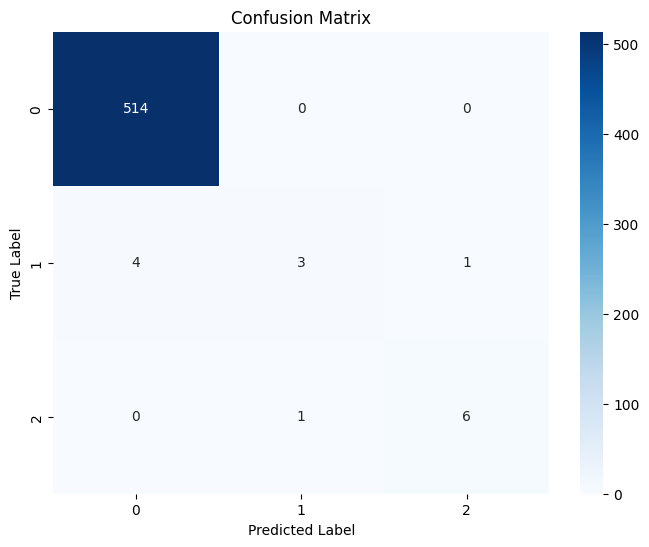

In [ ]:
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## 2) Î≥ÄÏàò Ï§ëÏöîÎèÑ

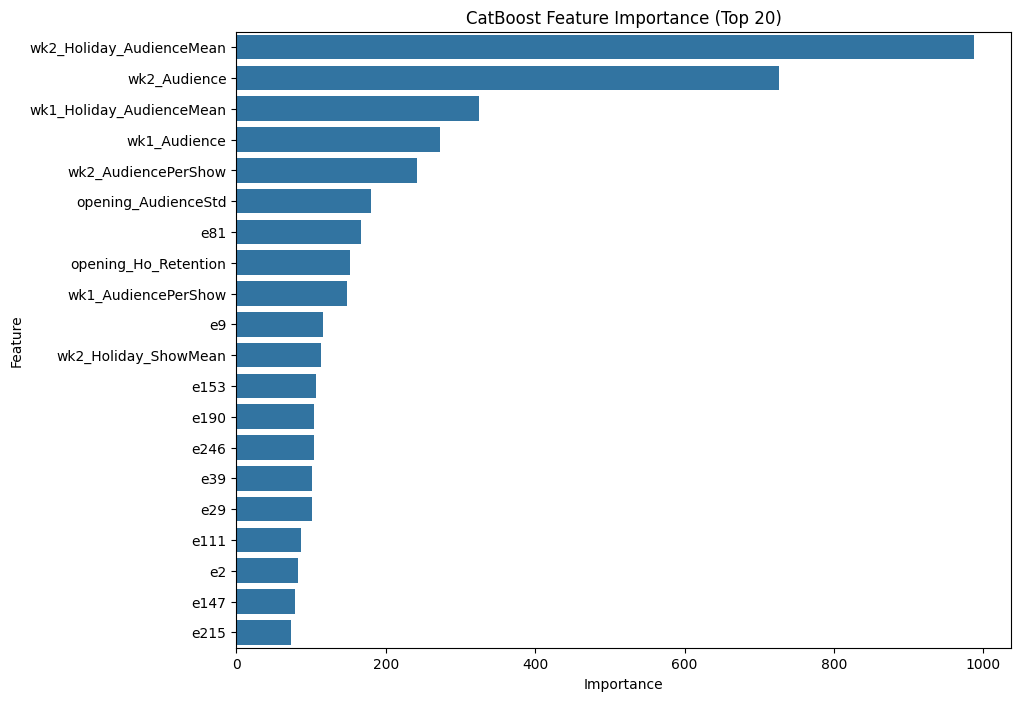

                      Feature  Importance
8    wk2_Holiday_AudienceMean         988
2                wk2_Audience         726
6    wk1_Holiday_AudienceMean         325
0                wk1_Audience         273
3         wk2_AudiencePerShow         242
10        opening_AudienceStd         180
99                        e81         167
5        opening_Ho_Retention         152
1         wk1_AudiencePerShow         148
27                         e9         116
9        wk2_Holiday_ShowMean         113
171                      e153         107
208                      e190         104
264                      e246         104
57                        e39         102
47                        e29         101
129                      e111          87
20                         e2          83
165                      e147          78
233                      e215          73


In [ ]:
# 1. Î≥ÄÏàò Ï§ëÏöîÎèÑ Ï∂îÏ∂ú
feature_importances = model.feature_importances_
feature_names = X_train.columns

# 2. Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú ÎßåÎì§Í∏∞
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# 3. ÏÉÅÏúÑ 20Í∞ú Î≥ÄÏàò Ï§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title('CatBoost Feature Importance (Top 20)')
plt.show()

# 4. Ï§ëÏöîÎèÑ Ï∂úÎ†•
print(importance_df.head(20))

1. `wk2_Holiday_AudienceMean`, `wk2_Audience`
2. `wk1_Holiday_AudienceMean`, ` wk1_Audience`, `wk2_AudiencePerShow`, `opening_AudienceStd`
3. ` wk1_AudiencePerShow`, `opening_Ho_Retention`, `wk2_Holiday_ShowMean`

Ï¥ù 2+4+3Í∞úÏùò Î≥ÄÏàòÍ∞Ä Ïú†Ïùògnqh

## 3) Î≥ÄÏàò ÏÑ†ÌÉù Î∞è ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù

In [ ]:
feature_sets = {
    "base_2": ['wk2_Holiday_AudienceMean', 'wk2_Audience'],
    "medium_6": ['wk2_Holiday_AudienceMean', 'wk2_Audience',
               'wk1_Holiday_AudienceMean', 'wk1_Audience', 'wk2_AudiencePerShow', 'opening_AudienceStd'],
    "full_9": ['wk2_Holiday_AudienceMean', 'wk2_Audience',
               'wk1_Holiday_AudienceMean', 'wk1_Audience', 'wk2_AudiencePerShow', 'opening_AudienceStd',
               'wk1_AudiencePerShow', 'opening_Ho_Retention', 'wk2_Holiday_ShowMean']
}

embedding_sets = {
    "embed_128": [f'e{i+1}' for i in range(128)],
    "embed_64": [f'e{i+1}' for i in range(64)],
    "embed_32": [f'e{i+1}' for i in range(32)],
    "embed_none" : []
}

tuner_methods = ['optuna', 'random_search']
# tuner_methods = ['random_search', 'optuna']

In [ ]:
# --- Ïã§Ìóò Î£®ÌîÑ ---
results = []
experiment_id = 0
total_experiments = len(feature_sets) * len(embedding_sets) * len(tuner_methods)

for f_name, f_cols in feature_sets.items():
    for e_name, e_cols in embedding_sets.items():

        # ÌòÑÏû¨ Ï°∞Ìï©Ïóê ÏÇ¨Ïö©Ìï† Ï†ÑÏ≤¥ Î≥ÄÏàò Î¶¨Ïä§Ìä∏ ÏÉùÏÑ±
        current_cols = f_cols + e_cols
        X_train_exp = X_train[current_cols].copy()
        X_test_exp = X_test[current_cols].copy()

        for tuner in tuner_methods:
            experiment_id += 1
            print(f"--- Ïã§Ìóò {experiment_id}/{total_experiments} ÏßÑÌñâ Ï§ë ---")
            print(f"Features: {f_name}, Embeddings: {e_name}, Tuner: {tuner}")

            best_params = {}

            if tuner == 'optuna':
                def objective(trial):
                    param_optuna = {
                        'metric': 'multi_logloss',

                        'n_estimators': 300,
                        # 'n_estimators': 2,

                        'verbose': -1,
                        'device': 'gpu',
                        'gpu_device_id': 0,

                        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
                        'num_leaves': trial.suggest_int('num_leaves', 20, 300),
                        'max_depth': trial.suggest_int('max_depth', 4, 10),
                        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
                        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
                        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
                        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True),
                        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
                    }
                    model = lgb.LGBMClassifier(objective='multiclass', class_weight='balanced', **param_optuna)
                    score = cross_val_score(model, X_train_exp, y_train, cv=3, scoring='f1_macro').mean()
                    return score

                study = optuna.create_study(direction='maximize')

                study.optimize(objective, n_trials=40, show_progress_bar=True)
                # study.optimize(objective, n_trials=2, show_progress_bar=True)

                best_params = study.best_params

            elif tuner == 'random_search':
                param_random = {
                    'learning_rate': uniform(0.01, 0.29),
                    'num_leaves': randint(20, 301),
                    'max_depth': randint(4, 11),
                    'subsample': uniform(0.6, 0.4),
                    'colsample_bytree': uniform(0.6, 0.4),
                    'reg_alpha': uniform(1, 9),
                    'reg_lambda': uniform(1, 9),
                    'min_child_samples': randint(5, 101),
                }

                model = lgb.LGBMClassifier(objective='multiclass', class_weight='balanced', n_estimators=300, verbose=-1, device='gpu', gpu_device_id=0)
                # model = lgb.LGBMClassifier(objective='multiclass', class_weight='balanced',n_estimators=2, verbose=-1, device='gpu', gpu_device_id=0)

                random_search = RandomizedSearchCV(
                    model,
                    param_distributions=param_random,

                    n_iter=40,
                    # n_iter=2,

                    cv=3,
                    scoring='f1_macro',
                    random_state=42,
                    verbose=1,
                )
                random_search.fit(X_train_exp, y_train)
                best_params = random_search.best_params_

            # Ï∞æÏùÄ ÏµúÏ†ÅÏùò ÌååÎùºÎØ∏ÌÑ∞Î°ú ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ
            print(f"{f_name} - {e_name} - {tuner} ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ")
            final_model = lgb.LGBMClassifier(
                objective='multiclass',
                class_weight='balanced',

                n_estimators=1000,
                # n_estimators=2,

                device='gpu',
                gpu_device_id=0,
                **best_params
            )
            # fit Ìï† Îïå Î°úÍ∑∏ Ï∂úÎ†• ÏÑ§Ï†ï (callbacks)
            final_model.fit(X_train_exp, y_train, callbacks=[lgb.log_evaluation(period=200)])

            # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú ÏÑ±Îä• ÌèâÍ∞Ä
            preds = final_model.predict(X_test_exp)
            f1 = f1_score(y_test, preds, average='macro')
            detailed_metrics = calculate_multiclass_metrics(y_test, preds)

            # Í≤∞Í≥º Ï†ÄÏû•
            result_row = {
                "Experiment_ID": experiment_id,
                "Feature_Set": f_name,
                "Embedding_Set": e_name,
                "Tuner": tuner,
                "Test_F1_Macro": f1,
                "Best_Params": best_params
            }
            result_row.update(detailed_metrics)
            results.append(result_row)
            print(f"Í≤∞Í≥º - F1 Macro: {f1:.4f}\n")

--- Ïã§Ìóò 1/24 ÏßÑÌñâ Ï§ë ---
Features: base_2, Embeddings: embed_128, Tuner: optuna


  0%|          | 0/40 [00:00<?, ?it/s]

base_2 - embed_128 - optuna ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ
Í≤∞Í≥º - F1 Macro: 0.7713

--- Ïã§Ìóò 2/24 ÏßÑÌñâ Ï§ë ---
Features: base_2, Embeddings: embed_128, Tuner: random_search
Fitting 3 folds for each of 40 candidates, totalling 120 fits
base_2 - embed_128 - random_search ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ
Í≤∞Í≥º - F1 Macro: 0.7900

--- Ïã§Ìóò 3/24 ÏßÑÌñâ Ï§ë ---
Features: base_2, Embeddings: embed_64, Tuner: optuna


  0%|          | 0/40 [00:00<?, ?it/s]

base_2 - embed_64 - optuna ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ
Í≤∞Í≥º - F1 Macro: 0.7600

--- Ïã§Ìóò 4/24 ÏßÑÌñâ Ï§ë ---
Features: base_2, Embeddings: embed_64, Tuner: random_search
Fitting 3 folds for each of 40 candidates, totalling 120 fits
base_2 - embed_64 - random_search ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ
Í≤∞Í≥º - F1 Macro: 0.7565

--- Ïã§Ìóò 5/24 ÏßÑÌñâ Ï§ë ---
Features: base_2, Embeddings: embed_32, Tuner: optuna


  0%|          | 0/40 [00:00<?, ?it/s]

base_2 - embed_32 - optuna ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ
Í≤∞Í≥º - F1 Macro: 0.7193

--- Ïã§Ìóò 6/24 ÏßÑÌñâ Ï§ë ---
Features: base_2, Embeddings: embed_32, Tuner: random_search
Fitting 3 folds for each of 40 candidates, totalling 120 fits
base_2 - embed_32 - random_search ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ
Í≤∞Í≥º - F1 Macro: 0.7838

--- Ïã§Ìóò 7/24 ÏßÑÌñâ Ï§ë ---
Features: base_2, Embeddings: embed_none, Tuner: optuna


  0%|          | 0/40 [00:00<?, ?it/s]

base_2 - embed_none - optuna ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ
Í≤∞Í≥º - F1 Macro: 0.7838

--- Ïã§Ìóò 8/24 ÏßÑÌñâ Ï§ë ---
Features: base_2, Embeddings: embed_none, Tuner: random_search
Fitting 3 folds for each of 40 candidates, totalling 120 fits
base_2 - embed_none - random_search ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ
Í≤∞Í≥º - F1 Macro: 0.7690

--- Ïã§Ìóò 9/24 ÏßÑÌñâ Ï§ë ---
Features: medium_6, Embeddings: embed_128, Tuner: optuna


  0%|          | 0/40 [00:00<?, ?it/s]

medium_6 - embed_128 - optuna ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ
Í≤∞Í≥º - F1 Macro: 0.7713

--- Ïã§Ìóò 10/24 ÏßÑÌñâ Ï§ë ---
Features: medium_6, Embeddings: embed_128, Tuner: random_search
Fitting 3 folds for each of 40 candidates, totalling 120 fits
medium_6 - embed_128 - random_search ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ
Í≤∞Í≥º - F1 Macro: 0.7673

--- Ïã§Ìóò 11/24 ÏßÑÌñâ Ï§ë ---
Features: medium_6, Embeddings: embed_64, Tuner: optuna


  0%|          | 0/40 [00:00<?, ?it/s]

medium_6 - embed_64 - optuna ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ
Í≤∞Í≥º - F1 Macro: 0.7952

--- Ïã§Ìóò 12/24 ÏßÑÌñâ Ï§ë ---
Features: medium_6, Embeddings: embed_64, Tuner: random_search
Fitting 3 folds for each of 40 candidates, totalling 120 fits
medium_6 - embed_64 - random_search ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ
Í≤∞Í≥º - F1 Macro: 0.7983

--- Ïã§Ìóò 13/24 ÏßÑÌñâ Ï§ë ---
Features: medium_6, Embeddings: embed_32, Tuner: optuna


  0%|          | 0/40 [00:00<?, ?it/s]

medium_6 - embed_32 - optuna ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ
Í≤∞Í≥º - F1 Macro: 0.7600

--- Ïã§Ìóò 14/24 ÏßÑÌñâ Ï§ë ---
Features: medium_6, Embeddings: embed_32, Tuner: random_search
Fitting 3 folds for each of 40 candidates, totalling 120 fits
medium_6 - embed_32 - random_search ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ
Í≤∞Í≥º - F1 Macro: 0.7922

--- Ïã§Ìóò 15/24 ÏßÑÌñâ Ï§ë ---
Features: medium_6, Embeddings: embed_none, Tuner: optuna


  0%|          | 0/40 [00:00<?, ?it/s]

medium_6 - embed_none - optuna ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ
Í≤∞Í≥º - F1 Macro: 0.8650

--- Ïã§Ìóò 16/24 ÏßÑÌñâ Ï§ë ---
Features: medium_6, Embeddings: embed_none, Tuner: random_search
Fitting 3 folds for each of 40 candidates, totalling 120 fits
medium_6 - embed_none - random_search ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ
Í≤∞Í≥º - F1 Macro: 0.8543

--- Ïã§Ìóò 17/24 ÏßÑÌñâ Ï§ë ---
Features: full_9, Embeddings: embed_128, Tuner: optuna


  0%|          | 0/40 [00:00<?, ?it/s]

full_9 - embed_128 - optuna ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ
Í≤∞Í≥º - F1 Macro: 0.7952

--- Ïã§Ìóò 18/24 ÏßÑÌñâ Ï§ë ---
Features: full_9, Embeddings: embed_128, Tuner: random_search
Fitting 3 folds for each of 40 candidates, totalling 120 fits
full_9 - embed_128 - random_search ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ
Í≤∞Í≥º - F1 Macro: 0.8396

--- Ïã§Ìóò 19/24 ÏßÑÌñâ Ï§ë ---
Features: full_9, Embeddings: embed_64, Tuner: optuna


  0%|          | 0/40 [00:00<?, ?it/s]

full_9 - embed_64 - optuna ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ
Í≤∞Í≥º - F1 Macro: 0.8135

--- Ïã§Ìóò 20/24 ÏßÑÌñâ Ï§ë ---
Features: full_9, Embeddings: embed_64, Tuner: random_search
Fitting 3 folds for each of 40 candidates, totalling 120 fits
full_9 - embed_64 - random_search ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ
Í≤∞Í≥º - F1 Macro: 0.8511

--- Ïã§Ìóò 21/24 ÏßÑÌñâ Ï§ë ---
Features: full_9, Embeddings: embed_32, Tuner: optuna


  0%|          | 0/40 [00:00<?, ?it/s]

full_9 - embed_32 - optuna ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ
Í≤∞Í≥º - F1 Macro: 0.7713

--- Ïã§Ìóò 22/24 ÏßÑÌñâ Ï§ë ---
Features: full_9, Embeddings: embed_32, Tuner: random_search
Fitting 3 folds for each of 40 candidates, totalling 120 fits
full_9 - embed_32 - random_search ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ
Í≤∞Í≥º - F1 Macro: 0.8511

--- Ïã§Ìóò 23/24 ÏßÑÌñâ Ï§ë ---
Features: full_9, Embeddings: embed_none, Tuner: optuna


  0%|          | 0/40 [00:00<?, ?it/s]

full_9 - embed_none - optuna ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ
Í≤∞Í≥º - F1 Macro: 0.7952

--- Ïã§Ìóò 24/24 ÏßÑÌñâ Ï§ë ---
Features: full_9, Embeddings: embed_none, Tuner: random_search
Fitting 3 folds for each of 40 candidates, totalling 120 fits
full_9 - embed_none - random_search ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ
Í≤∞Í≥º - F1 Macro: 0.8447



In [ ]:
# --- 4. ÏµúÏ¢Ö Í≤∞Í≥º Ï∑®Ìï© Î∞è Ï∂úÎ†• ---
results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values(by='Test_F1_Macro', ascending=False)

print("========== ÏµúÏ¢Ö Ïã§Ìóò Í≤∞Í≥º (F1 Score Í∏∞Ï§Ä Ï†ïÎ†¨) ==========")
results_df_sorted.head()

========== ÏµúÏ¢Ö Ïã§Ìóò Í≤∞Í≥º (F1 Score Í∏∞Ï§Ä Ï†ïÎ†¨) ==========


Experiment_ID Feature_Set Embedding_Set          Tuner  Test_F1_Macro  \
14             15    medium_6    embed_none         optuna       0.865041   
15             16    medium_6    embed_none  random_search       0.854280   
19             20      full_9      embed_64  random_search       0.851079   
21             22      full_9      embed_32  random_search       0.851079   
23             24      full_9    embed_none  random_search       0.844729   

                                          Best_Params  Precision_Class_0  \
14  {'learning_rate': 0.2902270639724662, 'num_lea...           0.998043   
15  {'colsample_bytree': 0.7942455014344907, 'lear...           1.000000   
19  {'colsample_bytree': 0.786705157299192, 'learn...           1.000000   
21  {'colsample_bytree': 0.7942455014344907, 'lear...           1.000000   
23  {'colsample_bytree': 0.786705157299192, 'learn...           1.000000   

    Recall_Class_0  Specificity_Class_0  Precision_Class_1  Recall_Class_1  \
14        0.992218             0.933333           0.600000           0.750   
15        0.986381             1.000000           0.500000           0.875   
19        0.992218             1.000000           0.583333           0.875   
21        0.992218             1.000000           0.583333           0.875   
23        0.984436             1.000000           0.466667           0.875   

    Specificity_Class_1  Precision_Class_2  Recall_Class_2  \
14             0.992322           0.875000        1.000000   
15             0.986564           0.875000        1.000000   
19             0.990403           0.857143        0.857143   
21             0.990403           0.857143        0.857143   
23             0.984645           0.875000        1.000000   

    Specificity_Class_2  
14             0.998084  
15             0.998084  
19             0.998084  
21             0.998084  
23             0.998084

## 4) ÏµúÏ¢Ö Î™®Îç∏ ÏÉùÏÑ±

In [ ]:
# --- 5. ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏ Ïû¨ÌïôÏäµ Î∞è Ï†ÄÏû• (LightGBM Î≤ÑÏ†Ñ) ---
print("\n========== ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏ Ïû¨ÌïôÏäµ Î∞è Ï†ÄÏû• ==========")

# 5-1. Í∞ÄÏû• Ï†êÏàòÍ∞Ä ÎÜíÏïòÎçò Ïã§ÌóòÏùò ÏÑ§Ï†ï Í∞ÄÏ†∏Ïò§Í∏∞
best_experiment = results_df_sorted.iloc[0]
best_f_name = best_experiment['Feature_Set']
best_e_name = best_experiment['Embedding_Set']
best_params = best_experiment['Best_Params']

print(f"ÏµúÍ≥† ÏÑ±Îä• Ï°∞Ìï©: Features='{best_f_name}', Embeddings='{best_e_name}'")
print(f"ÏµúÍ≥† ÏÑ±Îä• ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞: {best_params}")

# 5-2. ÏµúÍ≥† ÏÑ±Îä• Ï°∞Ìï©Ïóê ÎßûÎäî Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
best_f_cols = feature_sets[best_f_name]
best_e_cols = embedding_sets[best_e_name]
best_current_cols = best_f_cols + best_e_cols

# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ XÏóêÏÑú ÏµúÍ≥† ÏÑ±Îä•Ïùò Î≥ÄÏàòÎì§Îßå ÏÑ†ÌÉù
X_best_features = X[best_current_cols].copy() # .copy() Ï∂îÍ∞Ä

# 5-3. ÏµúÍ≥† ÏÑ±Îä• ÌååÎùºÎØ∏ÌÑ∞Î°ú ÏµúÏ¢Ö Î™®Îç∏ ÏÉùÏÑ±
best_model = lgb.LGBMClassifier(
    objective='MultiClass',
    auto_class_weights='Balanced',

    n_estimators=1000,
    device='gpu',
    gpu_device_id=0,
    **best_params
)

print("\nÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏ Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î°ú Ïû¨ÌïôÏäµ ÏãúÏûë...")
# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞(X_best_features, y)Î°ú ÏµúÏ¢Ö ÌïôÏäµ
best_model.fit(
    X_best_features,
    y,
    callbacks=[lgb.log_evaluation(period=200)] # verbose -> callbacks
)
print("Ïû¨ÌïôÏäµ ÏôÑÎ£å.")

# 5-4. Î™®Îç∏ ÌååÏùºÎ°ú Ï†ÄÏû• (‚òÖ‚òÖ LightGBM ÌïµÏã¨ Î∂ÄÎ∂Ñ ‚òÖ‚òÖ)
# .booster_ ÏÜçÏÑ±ÏùÑ ÌÜµÌï¥ LightGBMÏùò ÌïµÏã¨ Î™®Îç∏Ïóê Ï†ëÍ∑ºÌïòÏó¨ Ï†ÄÏû•Ìï©ÎãàÎã§.
best_model.booster_.save_model("/content/drive/MyDrive/·Ñá·Öµ·Ñã·Ö•·Ñë·Ö≥·ÜØ/25-2/model/lightgbm_model_5m.txt")
print("ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏ÏùÑ 'lightgbm_model_10k.txt' ÌååÏùºÎ°ú Ï†ÄÏû•ÌñàÏäµÎãàÎã§. üíæ")


========== ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏ Ïû¨ÌïôÏäµ Î∞è Ï†ÄÏû• ==========
ÏµúÍ≥† ÏÑ±Îä• Ï°∞Ìï©: Features='medium_6', Embeddings='embed_none'
ÏµúÍ≥† ÏÑ±Îä• ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞: {'learning_rate': 0.2902270639724662, 'num_leaves': 295, 'max_depth': 7, 'subsample': 0.7794092079790117, 'colsample_bytree': 0.7561910521805562, 'reg_alpha': 0.39739004576253223, 'reg_lambda': 0.0014459807475821593, 'min_child_samples': 17}

ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏ Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î°ú Ïû¨ÌïôÏäµ ÏãúÏûë...
Ïû¨ÌïôÏäµ ÏôÑÎ£å.
ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏ÏùÑ 'lightgbm_model_10k.txt' ÌååÏùºÎ°ú Ï†ÄÏû•ÌñàÏäµÎãàÎã§. üíæ


## ÏãúÍ∞ÅÌôî

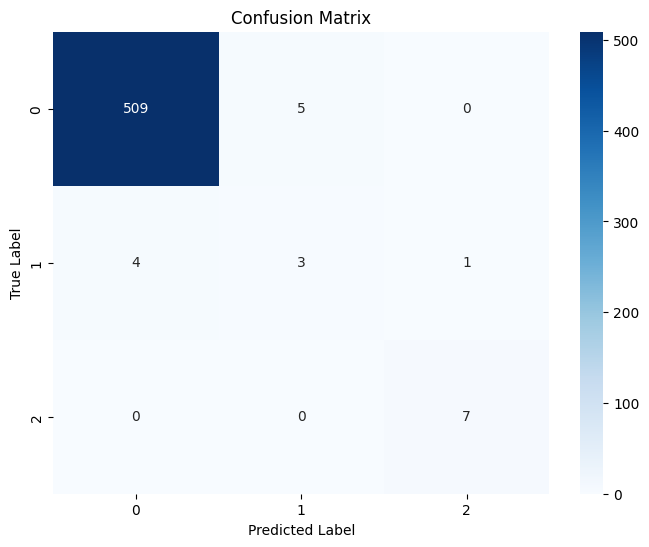

In [ ]:
X_train_best_feature = X_train[best_current_cols].copy()
X_test_best_feature = X_test[best_current_cols].copy()

sm_best_model = lgb.LGBMClassifier(
    objective='MultiClass',
    auto_class_weights='Balanced',

    n_estimators=1000,
    device='gpu',
    gpu_device_id=0,
    **best_params
)

sm_best_model.fit(
    X_train_best_feature,
    y_train,
    callbacks=[lgb.log_evaluation(period=200)] # verbose -> callbacks
)

predictions = sm_best_model.predict(X_test_best_feature)
prediction_probs = sm_best_model.predict_proba(X_test_best_feature)

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sm_best_model.classes_,
            yticklabels=sm_best_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()